In [20]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

#plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import sweetviz

#preprocessing
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import make_pipeline

In [21]:
metrics = []

In [22]:
# read the data
df = pd.read_csv('BMW.csv')
og = df.copy()
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,county,state,lat,long
0,7120880186,oregon coast,13750,2014,bmw,328i m-sport,good,NaN,gas,76237.0,...,automatic,NaN,rwd,NaN,sedan,grey,NaN,or,46.1837,-123.8240
1,7120774246,oregon coast,26500,2011,bmw,"m3 manual transmission, exc",NaN,8 cylinders,gas,54595.0,...,manual,WBSKG9C57BE797362,rwd,NaN,coupe,NaN,NaN,or,45.5772,-122.6760
2,7119860800,south florida,10995,2014,bmw,528i,NaN,NaN,gas,124756.0,...,automatic,WBA5A5C57ED507840,NaN,NaN,sedan,NaN,NaN,fl,28.4692,-81.3972
3,7119852086,south florida,13495,2012,bmw,335is m-package,like new,6 cylinders,gas,NaN,...,automatic,NaN,NaN,mid-size,convertible,white,NaN,fl,25.9631,-80.1701
4,7119849577,south florida,12995,2016,bmw,328i sport,like new,4 cylinders,gas,NaN,...,automatic,NaN,NaN,mid-size,sedan,blue,NaN,fl,25.9629,-80.1700


In [23]:
#report = sweetviz.analyze([df,'df'],target_feat='price')
#report.show_html('report.html')

In [24]:
#Reindexing to keep price at last
df= df.reindex(columns=['id', 'region', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
        'county', 'state', 'lat', 'long','price'])

In [25]:
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,vin,drive,size,type,paint_color,county,state,lat,long,price
0,7120880186,oregon coast,2014,bmw,328i m-sport,good,NaN,gas,76237.0,clean,...,NaN,rwd,NaN,sedan,grey,NaN,or,46.1837,-123.8240,13750
1,7120774246,oregon coast,2011,bmw,"m3 manual transmission, exc",NaN,8 cylinders,gas,54595.0,rebuilt,...,WBSKG9C57BE797362,rwd,NaN,coupe,NaN,NaN,or,45.5772,-122.6760,26500
2,7119860800,south florida,2014,bmw,528i,NaN,NaN,gas,124756.0,clean,...,WBA5A5C57ED507840,NaN,NaN,sedan,NaN,NaN,fl,28.4692,-81.3972,10995
3,7119852086,south florida,2012,bmw,335is m-package,like new,6 cylinders,gas,NaN,clean,...,NaN,NaN,mid-size,convertible,white,NaN,fl,25.9631,-80.1701,13495
4,7119849577,south florida,2016,bmw,328i sport,like new,4 cylinders,gas,NaN,clean,...,NaN,NaN,mid-size,sedan,blue,NaN,fl,25.9629,-80.1700,12995


In [26]:
df.shape

(4000, 21)

In [27]:
df.describe()

,id,year,odometer,county,lat,long,price
count,4.000000e+03,4000.000000,3.767000e+03,0.0,3772.000000,3772.000000,4000.000000
mean,7.116563e+09,2010.760000,8.383045e+04,NaN,37.078413,-99.169509,13140.502250
std,4.763143e+06,5.461809,1.363643e+05,NaN,5.458254,20.746744,10140.162065
min,7.105663e+09,1968.000000,0.000000e+00,NaN,19.647000,-158.031000,0.000000
25%,7.112966e+09,2008.000000,4.581300e+04,NaN,33.786500,-118.353250,5999.000000
50%,7.118514e+09,2012.000000,7.697900e+04,NaN,36.168050,-94.140650,11473.500000
75%,7.120689e+09,2015.000000,1.086495e+05,NaN,41.012400,-81.396400,18023.750000
max,7.121605e+09,2020.000000,7.670000e+06,NaN,64.815500,-68.791800,93630.000000


## Data Preprocessing

Missing Values

<AxesSubplot:>

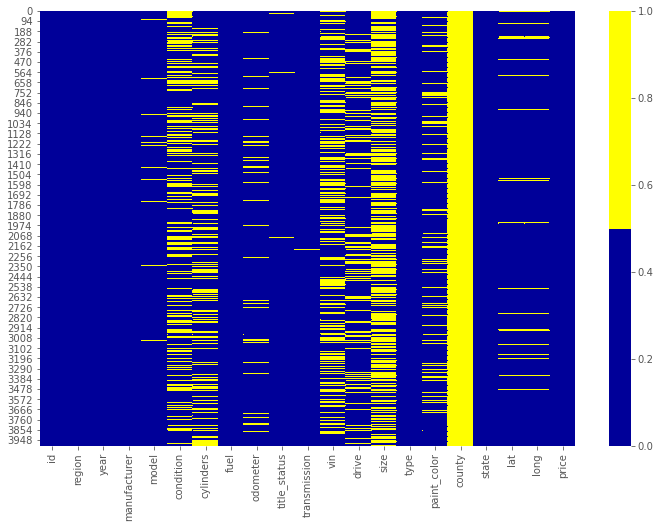

In [28]:
colours = ['#000099','#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

#Missing Values

In [29]:
df.notnull().sum().sum()

71485

In [30]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
region - 0%
year - 0%
manufacturer - 0%
model - 1%
condition - 33%
cylinders - 29%
fuel - 0%
odometer - 6%
title_status - 0%
transmission - 0%
vin - 38%
drive - 21%
size - 59%
type - 0%
paint_color - 13%
county - 100%
state - 0%
lat - 6%
long - 6%
price - 0%


In [31]:
#dropping irrelevant columns
drop_columns = ['id','manufacturer','vin','county']
cdf = df.drop(columns=drop_columns)

In [32]:
cdf.head()

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,oregon coast,2014,328i m-sport,good,NaN,gas,76237.0,clean,automatic,rwd,NaN,sedan,grey,or,46.1837,-123.8240,13750
1,oregon coast,2011,"m3 manual transmission, exc",NaN,8 cylinders,gas,54595.0,rebuilt,manual,rwd,NaN,coupe,NaN,or,45.5772,-122.6760,26500
2,south florida,2014,528i,NaN,NaN,gas,124756.0,clean,automatic,NaN,NaN,sedan,NaN,fl,28.4692,-81.3972,10995
3,south florida,2012,335is m-package,like new,6 cylinders,gas,NaN,clean,automatic,NaN,mid-size,convertible,white,fl,25.9631,-80.1701,13495
4,south florida,2016,328i sport,like new,4 cylinders,gas,NaN,clean,automatic,NaN,mid-size,sedan,blue,fl,25.9629,-80.1700,12995


In [33]:
cdf.isnull().sum().sum()

7013

# Taking care of missing values

In [34]:
#Filling all the null values
for i in cdf.drop(['paint_color','size'], axis = 1).columns:
    if cdf[i].dtypes =='float':
        cdf[i] = cdf[i].fillna(cdf[i].median())
    if cdf[i].dtype=='object':
        cdf[i]=cdf[i].fillna(cdf[i].mode()[0])
cdf['paint_color'] = cdf['paint_color'].fillna('Unknown')
cdf['size'] = cdf['size'].fillna('Unknown')
cleaned = cdf.copy()
cleaned.to_csv('cleaned.csv')

In [35]:
cdf.head()

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,oregon coast,2014,328i m-sport,good,6 cylinders,gas,76237.0,clean,automatic,rwd,Unknown,sedan,grey,or,46.1837,-123.8240,13750
1,oregon coast,2011,"m3 manual transmission, exc",excellent,8 cylinders,gas,54595.0,rebuilt,manual,rwd,Unknown,coupe,Unknown,or,45.5772,-122.6760,26500
2,south florida,2014,528i,excellent,6 cylinders,gas,124756.0,clean,automatic,rwd,Unknown,sedan,Unknown,fl,28.4692,-81.3972,10995
3,south florida,2012,335is m-package,like new,6 cylinders,gas,76979.0,clean,automatic,rwd,mid-size,convertible,white,fl,25.9631,-80.1701,13495
4,south florida,2016,328i sport,like new,4 cylinders,gas,76979.0,clean,automatic,rwd,mid-size,sedan,blue,fl,25.9629,-80.1700,12995


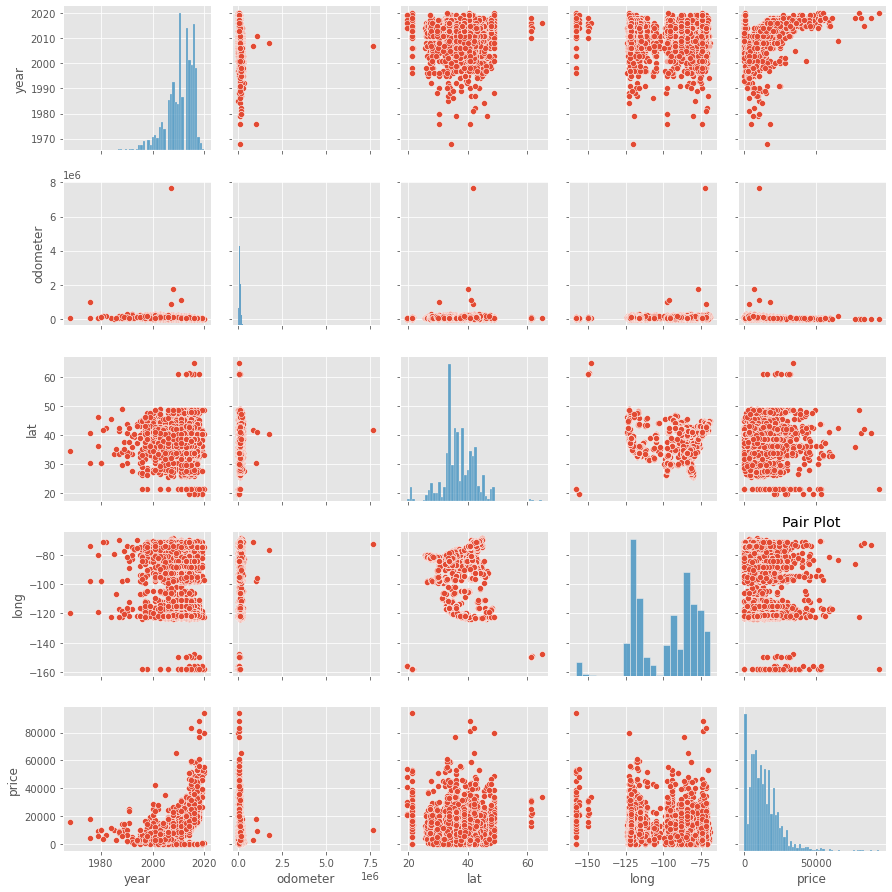

In [36]:
g = sns.pairplot(cleaned)
plt.title('Pair Plot')
plt.tight_layout()
plt.savefig('Insight-pair-plot')
plt.show()

C:\Users\Vishwesh\anaconda3\envs\envname\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


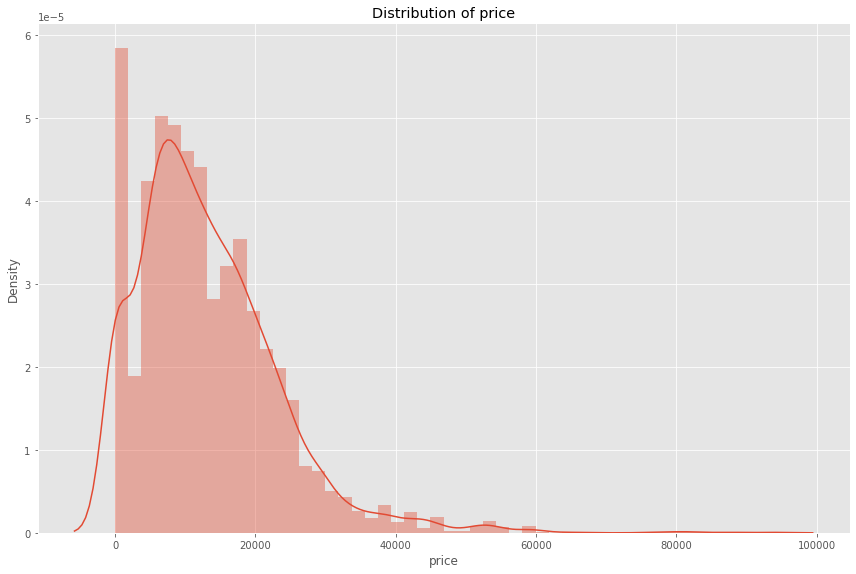

In [63]:
sns.distplot(cleaned.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

In [37]:
cleaned.head()

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,oregon coast,2014,328i m-sport,good,6 cylinders,gas,76237.0,clean,automatic,rwd,Unknown,sedan,grey,or,46.1837,-123.8240,13750
1,oregon coast,2011,"m3 manual transmission, exc",excellent,8 cylinders,gas,54595.0,rebuilt,manual,rwd,Unknown,coupe,Unknown,or,45.5772,-122.6760,26500
2,south florida,2014,528i,excellent,6 cylinders,gas,124756.0,clean,automatic,rwd,Unknown,sedan,Unknown,fl,28.4692,-81.3972,10995
3,south florida,2012,335is m-package,like new,6 cylinders,gas,76979.0,clean,automatic,rwd,mid-size,convertible,white,fl,25.9631,-80.1701,13495
4,south florida,2016,328i sport,like new,4 cylinders,gas,76979.0,clean,automatic,rwd,mid-size,sedan,blue,fl,25.9629,-80.1700,12995


In [38]:
cdf.isnull().sum()

region          0
year            0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
price           0
dtype: int64

In [39]:
#Creating separate lists of colums with numeric and category vars
num_cols=['year','odometer','lat','long']
cat_cols=['region','model','condition','cylinders','fuel','title_status','transmission',
          'drive','size','type','paint_color','state']

In [40]:
#Encoding Categorical Variables
for col in cat_cols:
    if col in cdf.columns:
        le = LabelEncoder()
        le.fit(list(cdf[col].astype(str).values))
        cdf[col] = le.transform(list(cdf[col].astype(str).values))

In [41]:
cdf.head(10)

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,183,2014,161,2,5,2,76237.0,0,0,2,0,3,6,35,46.1837,-123.8240,13750
1,183,2011,530,0,6,2,54595.0,2,1,2,0,1,0,35,45.5772,-122.6760,26500
2,224,2014,340,0,5,2,124756.0,0,0,2,0,3,0,8,28.4692,-81.3972,10995
3,224,2012,229,3,5,2,76979.0,0,0,2,3,0,11,8,25.9631,-80.1701,13495
4,224,2016,166,3,3,2,76979.0,0,0,2,3,3,2,8,25.9629,-80.1700,12995
5,224,2013,360,3,5,2,76979.0,0,0,2,3,3,2,8,25.9629,-80.1700,9495
6,224,2013,51,3,3,2,76979.0,0,0,1,2,3,11,8,26.0968,-80.1810,11900
7,224,2014,419,0,5,2,87317.0,0,0,0,0,3,2,8,26.1526,-80.2020,21977
8,224,2013,154,3,5,2,76979.0,0,0,1,2,0,1,8,26.1122,-80.2264,8499
9,224,2006,121,2,5,2,76979.0,0,0,2,0,3,1,8,25.6694,-80.4085,4500


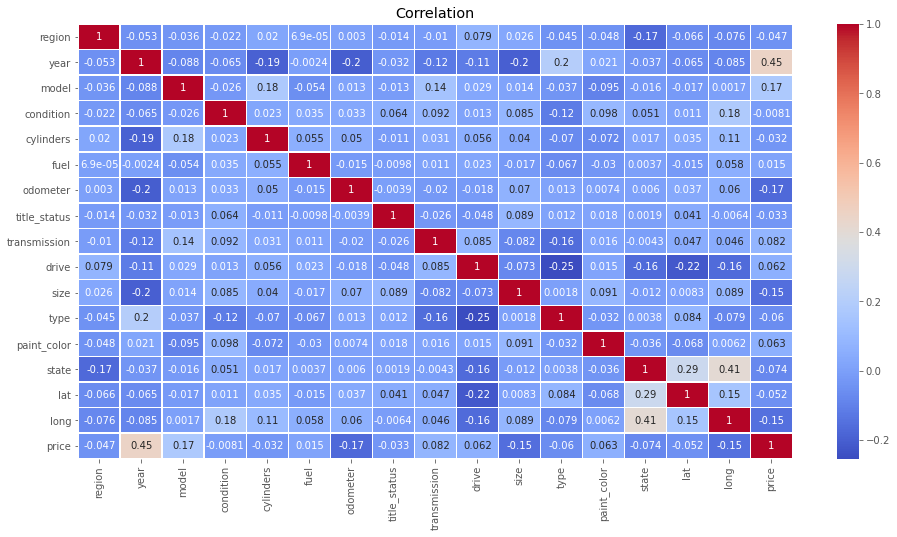

In [42]:
plt.figure(figsize = (16,8))
sns_plot = sns.heatmap(cdf.corr(), annot = True, cmap="coolwarm",linewidth=.5).set_title("Correlation")

### Outliers

In [43]:
#it will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

## Price

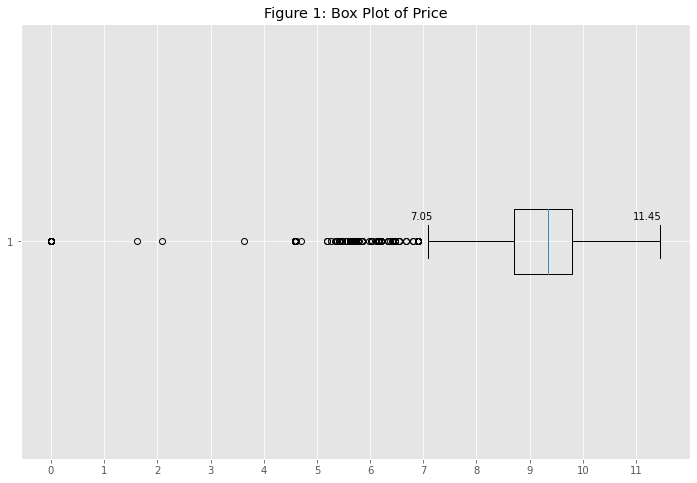

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,183,2014,161,2,5,2,76237.0,0,0,2,0,3,6,35,46.1837,-123.8240,13750
1,183,2011,530,0,6,2,54595.0,2,1,2,0,1,0,35,45.5772,-122.6760,26500
2,224,2014,340,0,5,2,124756.0,0,0,2,0,3,0,8,28.4692,-81.3972,10995
3,224,2012,229,3,5,2,76979.0,0,0,2,3,0,11,8,25.9631,-80.1701,13495
4,224,2016,166,3,3,2,76979.0,0,0,2,3,3,2,8,25.9629,-80.1700,12995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,171,2001,127,0,5,2,76979.0,0,0,1,3,3,10,29,40.9069,-74.1209,2900
3996,246,2016,65,2,5,2,77185.0,0,0,2,0,4,11,8,33.7865,-84.4454,17990
3997,236,1998,576,2,5,2,150211.0,0,1,2,0,0,0,13,38.6318,-90.6142,6100
3998,246,2016,24,2,5,2,37728.0,0,0,2,0,0,2,8,33.7865,-84.4454,22500


In [44]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)

np.seterr(divide='ignore') # Divide by Zero error
cdf['logprice'] = np.log(cdf['price'])
x=cdf['logprice']
price_range=list(range(0,int(max(cdf['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(cdf)[0]-0.3,1.05,str(round(min_max_price(cdf)[0],2)))
plt.text(min_max_price(cdf)[1]-0.5,1.05,str(round(min_max_price(cdf)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()
cdf.drop('logprice', axis="columns")

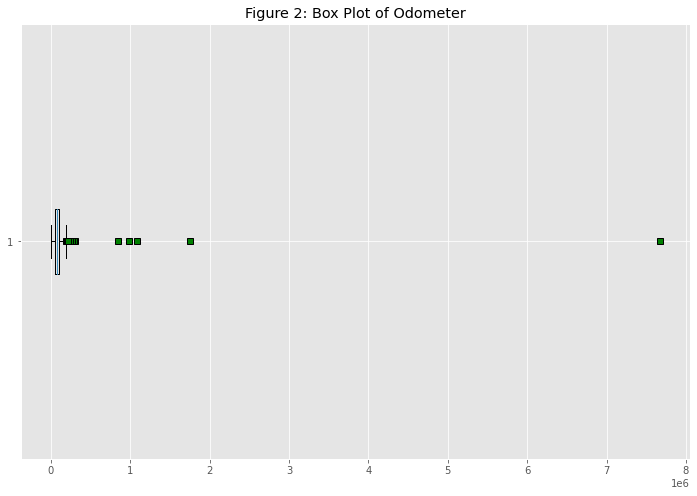

In [45]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Odometer')
ax1.boxplot(cdf['odometer'], vert=False, flierprops=red_square)
plt.savefig('graph-boxplot-odometer.jpg')
plt.show()

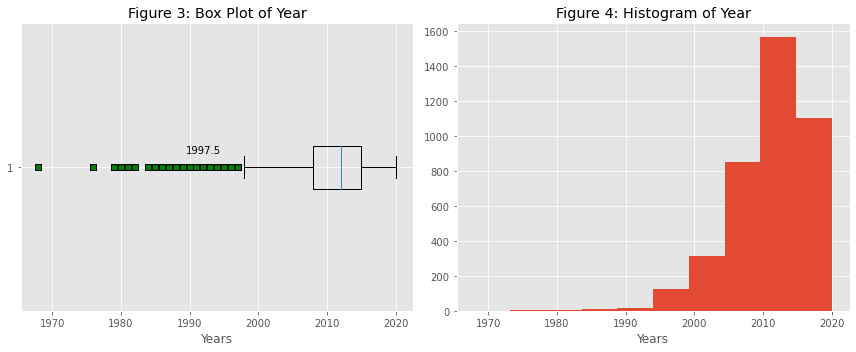

In [46]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#ploting boxplot
o1,o2=outliers(cdf,'year')
ax1.boxplot(sorted(cdf['year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(cdf['year'])
n, bins, patches = ax2.hist(x=cdf['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-year.jpg',dpi=1200)
plt.show()

In [47]:
#removing outliers 
df_new=cdf.copy()
out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 7.022619658646324 11.505007453137626
IQR of odometer = -37649.5 195658.5
IQR of year = 1999.0 2023.0


In [48]:
df_new.head()

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,183,2014,161,2,5,2,76237.0,0,0,2,0,3,6,35,46.1837,-123.8240,13750
1,183,2011,530,0,6,2,54595.0,2,1,2,0,1,0,35,45.5772,-122.6760,26500
2,224,2014,340,0,5,2,124756.0,0,0,2,0,3,0,8,28.4692,-81.3972,10995
3,224,2012,229,3,5,2,76979.0,0,0,2,3,0,11,8,25.9631,-80.1701,13495
4,224,2016,166,3,3,2,76979.0,0,0,2,3,3,2,8,25.9629,-80.1700,12995


In [49]:
#df_new.to_csv('Transformed.csv')

In [50]:
cdf.head()

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price,logprice
0,183,2014,161,2,5,2,76237.0,0,0,2,0,3,6,35,46.1837,-123.8240,13750,9.528794
1,183,2011,530,0,6,2,54595.0,2,1,2,0,1,0,35,45.5772,-122.6760,26500,10.184900
2,224,2014,340,0,5,2,124756.0,0,0,2,0,3,0,8,28.4692,-81.3972,10995,9.305196
3,224,2012,229,3,5,2,76979.0,0,0,2,3,0,11,8,25.9631,-80.1701,13495,9.510075
4,224,2016,166,3,3,2,76979.0,0,0,2,3,3,2,8,25.9629,-80.1700,12995,9.472320


In [51]:
print("Shape before process=",og.shape)
print("Shape After process=",cdf.shape)
diff=og.shape[0]-cdf.shape[0]
print("Total {} rows and {} cols removed".format(diff,og.shape[1]-cdf.shape[1]))

Shape before process= (4000, 21)
Shape After process= (4000, 18)
Total 0 rows and 3 cols removed


In [52]:
df = df_new.copy()

In [53]:
display(cdf.iloc[682])

region             248.000000
year              2011.000000
model               89.000000
condition            0.000000
cylinders            5.000000
fuel                 2.000000
odometer        112078.000000
title_status         0.000000
transmission         0.000000
drive                2.000000
size                 1.000000
type                 3.000000
paint_color         10.000000
state                3.000000
lat                 32.207800
long              -110.890000
price             6995.000000
logprice             8.852951
Name: 682, dtype: float64

In [54]:
df.tail(5)

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
3994,271,2006,117,0,5,2,107754.0,0,1,2,0,0,0,4,39.1234,-121.6110,8999
3995,171,2001,127,0,5,2,76979.0,0,0,1,3,3,10,29,40.9069,-74.1209,2900
3996,246,2016,65,2,5,2,77185.0,0,0,2,0,4,11,8,33.7865,-84.4454,17990
3998,246,2016,24,2,5,2,37728.0,0,0,2,0,0,2,8,33.7865,-84.4454,22500
3999,246,2013,53,2,5,2,28345.0,0,0,2,0,0,11,8,33.7865,-84.4454,19900


# SCaling

In [55]:
norm = StandardScaler()
df['price'] = np.log(df['price'])
#df['price'] = norm.fit_transform(np.array(df['price']).reshape(-1,1))
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))
#--
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]
#---
df['state'] = norm.fit_transform(np.array(df['state']).reshape(-1,1))
df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = norm.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = norm.fit_transform(np.array(df['long']).reshape(-1,1))

# Train Test Split


In [56]:
df.head()

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,0.602199,0.647768,-0.615608,2,5,2,-0.082335,0,0,2,0,3,6,1.090643,1.677129,-1.184561,9.528794
1,0.602199,-0.047055,1.569344,0,6,2,-0.625616,2,1,2,0,1,0,1.090643,1.566191,-1.128503,10.184900
2,1.107027,0.647768,0.444301,0,5,2,1.135643,0,0,2,0,3,0,-0.746933,-1.563120,0.887215,9.305196
3,1.107027,0.184553,-0.212961,3,5,2,-0.063708,0,0,2,3,0,11,-0.746933,-2.021523,0.947136,9.510075
4,1.107027,1.110983,-0.586002,3,3,2,-0.063708,0,0,2,3,3,2,-0.746933,-2.021559,0.947141,9.472320


In [57]:
X = df.drop(['price'], axis = 'columns')
y = df.price

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [59]:
res = pd.DataFrame()

# ANOVA F - test

Feature 0: 0.919935
Feature 1: 7.130760
Feature 2: 1.788949
Feature 3: 2.040176
Feature 4: 2.060807
Feature 5: 1.244164
Feature 6: 5.289386
Feature 7: 1.091676
Feature 8: 1.918230
Feature 9: 1.647407
Feature 10: 1.608675
Feature 11: 1.986608
Feature 12: 1.579577
Feature 13: 1.516398
Feature 14: 1.602226
Feature 15: 2.029488


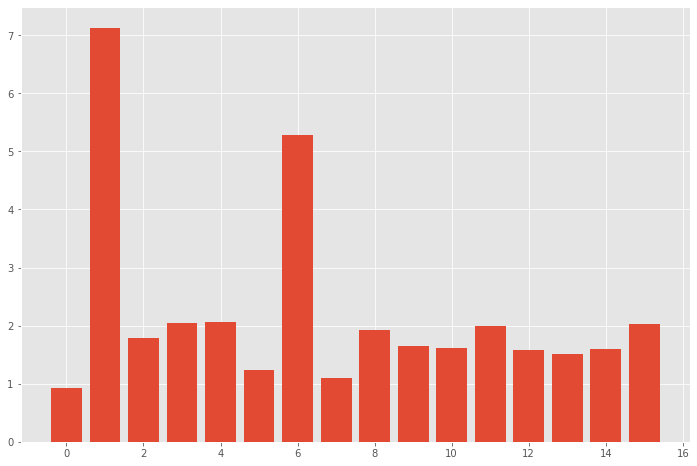

In [62]:
from sklearn.feature_selection import SelectFpr, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Linear Regression

In [64]:
#fitting model
import time
LR=LinearRegression()
start = time.time()
LR.fit(X_train,y_train)
stop = time.time()
print(f"Training Time: {stop - start}s")
lin_y_pred=LR.predict(X_test)

Training Time: 0.007999420166015625s


In [65]:
#calculating error/accuracy
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_mae = mean_absolute_error(y_test,lin_y_pred)
lin_loss = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2_score = r2_score(y_test,lin_y_pred)
print(lin_loss)
print(lin_r2_score)

0.29588721605049645
0.7701309754076552


In [66]:
print('Coefficients: ', LR.coef_)

Coefficients:  [-0.00539845  0.36416384  0.14192697 -0.01692666  0.01284916  0.04575733
 -0.20992071 -0.09525433  0.00674625  0.00207378 -0.0057116  -0.08109035
  0.00338322  0.00054565  0.02513797 -0.03062597]


In [67]:
print('Intercept: ', LR.intercept_)

Intercept:  9.465344561293909


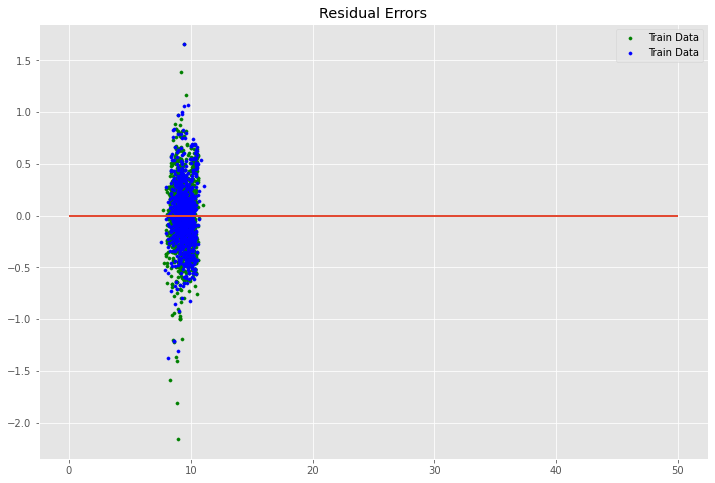

In [68]:
plt.scatter(LR.predict(X_train), LR.predict(X_train) - y_train, color = 'green', s = 10, label = 'Train Data')
plt.scatter(LR.predict(X_test), LR.predict(X_test) - y_test, color = 'blue', s = 10, label = 'Train Data')
plt.hlines(y=0, xmin=0, xmax = 50, linewidth = 2)
plt.legend(loc='upper right')
plt.title("Residual Errors")
plt.show()

In [69]:
metrics.insert(6,('Linear Regression',lin_r2_score,lin_mse,lin_loss,lin_mae))

In [70]:
metrics

[('Linear Regression',
  0.7701309754076552,
  0.08754924462211316,
  0.29588721605049645,
  0.21463018380504126)]

In [71]:
features = X_test.values.tolist()

### Feature Importance

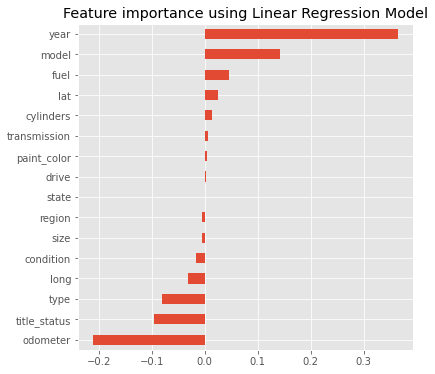

In [72]:
#Ploting feature importance graph
coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.show()

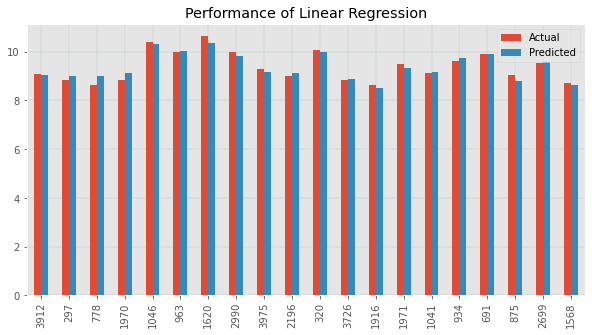

In [73]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': lin_y_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.show()

In [74]:
lin_pred = pd.DataFrame()

In [75]:
lin_pred['y_test'] = y_test
lin_pred['lin_y_pred'] = lin_y_pred

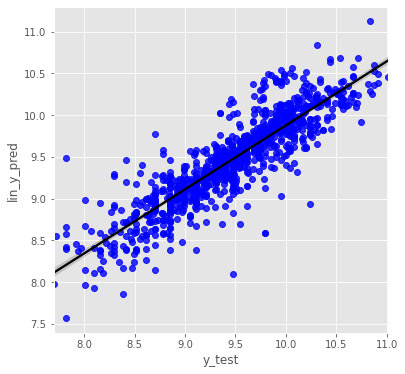

In [76]:
g = sns.regplot( x ='y_test', y ='lin_y_pred', scatter = True,
            data =lin_pred, scatter_kws={"color": "blue"}, line_kws ={"color": 'black'})

# SVM

In [77]:
svr = SVR()
start = time.time()
svr.fit(X_train, y_train)
stop = time.time()
print(f"Training Time: {stop - start}s")
svr_y_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test,svr_y_pred)
svr_loss = np.sqrt(mean_squared_error(y_test,svr_y_pred))
svr_r2_score = r2_score(y_test,svr_y_pred)
print(svr_loss)
print(svr_r2_score)

Training Time: 0.11978673934936523s
0.27044534847141866
0.8079620408080386


In [78]:
metrics.insert(4,('Support Vector Regression',svr_r2_score,svr_mse,svr_loss,svr_mae))

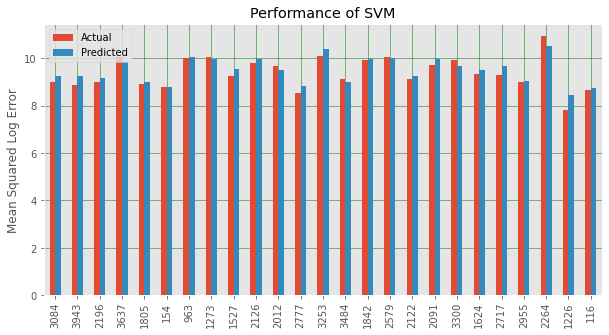

In [79]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': svr_y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of SVM')
plt.ylabel('Mean Squared Log Error')
plt.show()

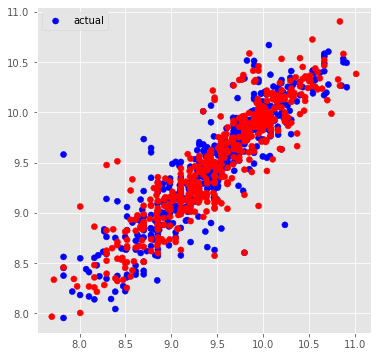

In [80]:
from itertools import repeat
c = []
c.extend(repeat('blue', 508))
c.extend(repeat('red', 508))
plt.scatter(y_test, svr_y_pred, color= c)
plt.legend(["actual"])
plt.show()

In [81]:

plt.show()

# Decision Tree

In [82]:
dt_reg = DecisionTreeRegressor(random_state = 0)
start = time.time()
dt_reg.fit(X_train, y_train)
stop = time.time()
print(f"Training Time: {stop - start}s")
dt_y_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test,dt_y_pred)
dt_loss = np.sqrt(mean_squared_error(y_test,dt_y_pred))
dt_r2_score = r2_score(y_test,dt_y_pred)
print(dt_loss)
print(dt_r2_score)

Training Time: 0.011997699737548828s
0.3158901948388195
0.738000573262247


In [83]:
metrics.insert(5,('Decision Tree',dt_r2_score,dt_mse,dt_loss,dt_mae))

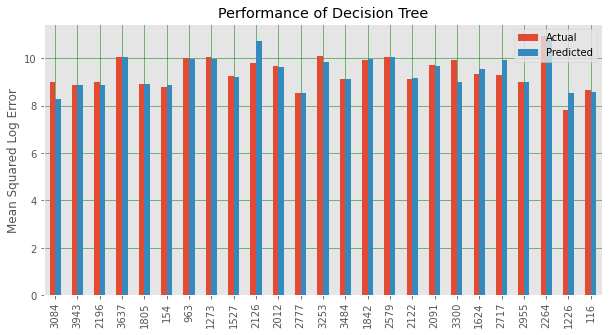

In [84]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': dt_y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Decision Tree')
plt.ylabel('Mean Squared Log Error')
plt.show()

# Random Forest Regression - BMW

In [85]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
start = time.time()
RFR.fit(X_train,y_train)
stop = time.time()
#print(f"Training Time for Random Forest: {stop - start}s")
rf_y_pred = RFR.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test,rf_y_pred)
rf_loss = np.sqrt(mean_squared_error(y_test,rf_y_pred))
rf_r2_score = r2_score(y_test,rf_y_pred)
print("RMSE: ", rf_loss)
print("R2 Score/ Model Accuracy: ", rf_r2_score)
ref_score = RFR.score(X_test,y_test)
print("ref_score: ",ref_score)

RMSE:  0.20388434593120727
R2 Score/ Model Accuracy:  0.8908570182886424
ref_score:  0.8908570182886424


In [86]:
#saving file
import pickle
filename = 'scoring_model.sav'
pickle.dump(RFR, open(filename, 'wb'))

In [87]:
#loading model
load_model = pickle.load(open(filename,'rb'))
ref_score2 = load_model.score(X_test, y_test)
print(ref_score2)

0.8908570182886425


In [88]:
rf_y_pred

array([ 9.00197831,  9.03196135,  8.93465456, ...,  9.84613833,
        9.7280869 , 10.01433121])

In [89]:
metrics.insert(2,('Random Forest',rf_r2_score,rf_mse,rf_loss,rf_mae))

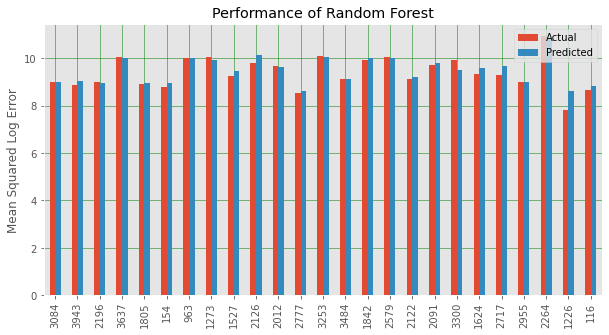

In [90]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': rf_y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.show()

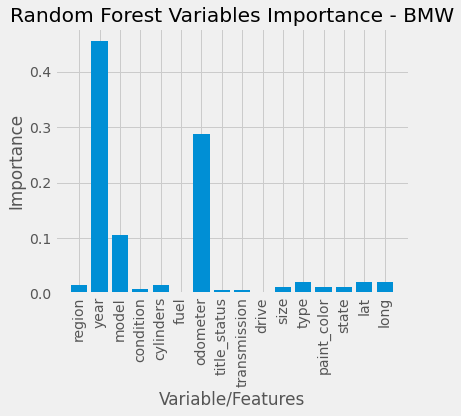

In [91]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance - BMW')
plt.tight_layout()
plt.show();

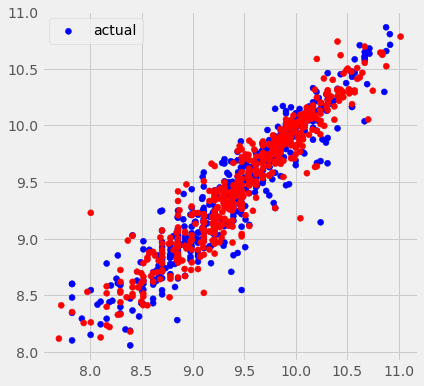

In [92]:
from itertools import repeat
c = []
c.extend(repeat('blue', 508))
c.extend(repeat('red', 508))
plt.scatter(y_test, rf_y_pred, color= c)
plt.legend(["actual"])
plt.show()

# XGBoost

In [93]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
start = time.time()
xg_reg.fit(X_train,y_train)
stop = time.time()
print(f"Training Time: {stop - start}s")
xg_y_pred = xg_reg.predict(X_test)
xg_mse = mean_squared_error(y_test, xg_y_pred)
xg_mae = mean_absolute_error(y_test,xg_y_pred)
xg_loss = np.sqrt(mean_squared_error(y_test,xg_y_pred))
xg_r2_score = r2_score(y_test,xg_y_pred)
print(xg_loss)
print(xg_r2_score)

Training Time: 0.10206794738769531s
0.2178110737960645
0.8754373147879186


In [94]:
metrics.insert(3,('XGBoost',xg_r2_score,xg_mse, xg_loss,xg_mae))

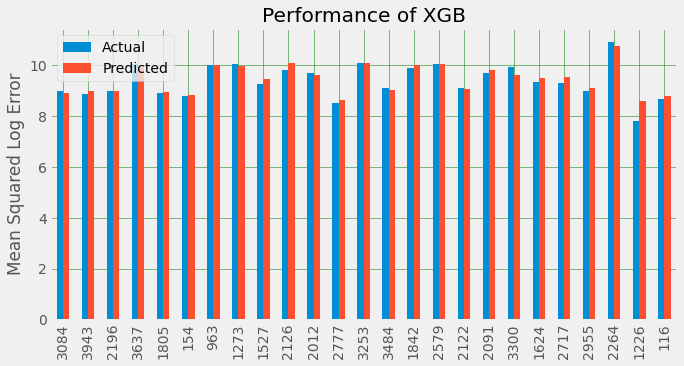

In [95]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': xg_y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of XGB')
plt.ylabel('Mean Squared Log Error')
plt.show()

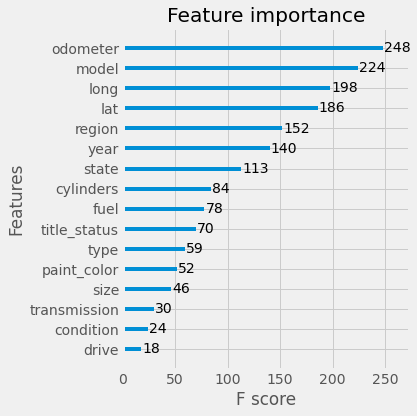

In [96]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.show();

# Light GBM

In [97]:
lgb_model = lgb.LGBMRegressor(
    boosting_type = 'gbdt',
    num_leaves = 31,
    n_estimators = 100,
    reg_lambda = 1.0
)

In [98]:
start = time.time()
lgb_model.fit(X_train, y_train)
stop = time.time()
print(f"Training Time: {stop - start}s")
lgb_y_pred = lgb_model.predict(X_test)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_mae = mean_absolute_error(y_test,lgb_y_pred)
lgb_loss = np.sqrt(mean_squared_error(y_test,lgb_y_pred))
lgb_r2_score = r2_score(y_test,lgb_y_pred)
print(lgb_loss)
print(lgb_r2_score)

Training Time: 0.05197000503540039s
0.20398612224899892
0.8907480256804535


In [99]:
metrics.insert(1,('Light Grad Boosting',lgb_r2_score,lgb_mse,lgb_loss,lgb_mae))

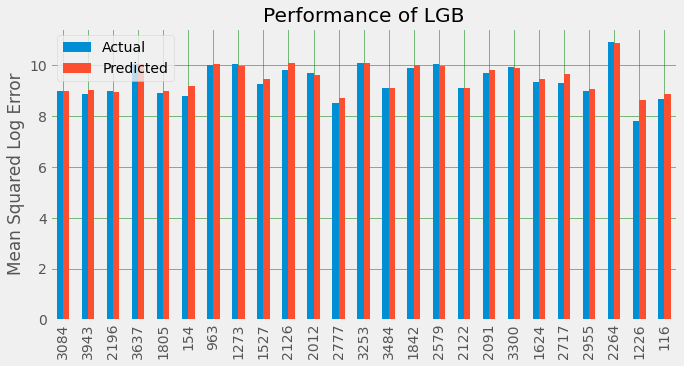

In [100]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': lgb_y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of LGB')
plt.ylabel('Mean Squared Log Error')
plt.show()

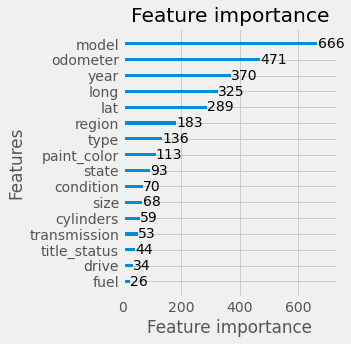

In [101]:
lgb.plot_importance(lgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.show();

## Metrics

In [102]:
eval_metrics = pd.DataFrame(metrics, columns = ['Model','R2 Score/Model Score', 'MSE', 'RMSE','MAE'])

In [103]:
eval_metrics = eval_metrics.sort_values(by=['R2 Score/Model Score'], ascending=False)

In [104]:
eval_metrics.head()
eval_metrics.to_csv('metrics.csv')

In [105]:
eval_metrics.head()

,Model,R2 Score/Model Score,MSE,RMSE,MAE
3,Random Forest,0.890857,0.041569,0.203884,0.140238
1,Light Grad Boosting,0.890748,0.041610,0.203986,0.141007
4,XGBoost,0.875437,0.047442,0.217811,0.152011
2,Support Vector Regression,0.807962,0.073141,0.270445,0.191967
0,Linear Regression,0.770131,0.087549,0.295887,0.214630


# Inversing Results from the best model

In [106]:
res['price'] = np.exp(y_test)

In [107]:
res['y_pred'] = np.exp(rf_y_pred)

In [108]:
res.head()

,price,y_pred
3084,7900.0,8119.130193
3943,7000.0,8366.252634
2196,7950.0,7590.513755
3637,22990.0,22542.469534
1805,7499.0,7861.134403


In [109]:
fin_result = pd.concat([cleaned, res], axis=1, join='inner')

In [110]:
fin_result.head()

,region,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price,price,y_pred
3,south florida,2012,335is m-package,like new,6 cylinders,gas,76979.0,clean,automatic,rwd,mid-size,convertible,white,fl,25.9631,-80.1701,13495,13495.0,12558.009596
4,south florida,2016,328i sport,like new,4 cylinders,gas,76979.0,clean,automatic,rwd,mid-size,sedan,blue,fl,25.9629,-80.1700,12995,12995.0,13483.497410
6,south florida,2013,3 series 328i,like new,4 cylinders,gas,76979.0,clean,automatic,fwd,full-size,sedan,white,fl,26.0968,-80.1810,11900,11900.0,12105.175466
7,south florida,2014,640i xdrive gran coupe,excellent,6 cylinders,gas,87317.0,clean,automatic,4wd,Unknown,sedan,blue,fl,26.1526,-80.2020,21977,21977.0,16129.626469
10,south florida,2008,750li,excellent,6 cylinders,gas,79156.0,clean,automatic,rwd,full-size,sedan,blue,fl,25.8409,-80.3111,9800,9800.0,7963.032967


# K Fold Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RFR, X= X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 87.51 %
Standard Deviation: 2.16%
